In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

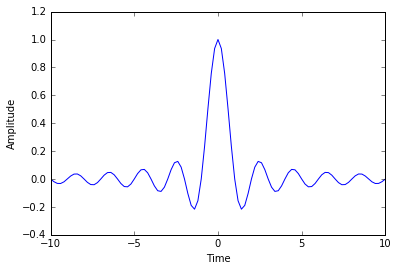

In [10]:
x=np.linspace(-40,40,401)

y=np.sinc(x)

plt.plot(x,y)
plt.xlim([-10,10])
plt.xlabel('Time')
plt.ylabel('Amplitude')

# plt.savefig('Test_Example1_files/'+'sincFun.pdf',format='pdf')

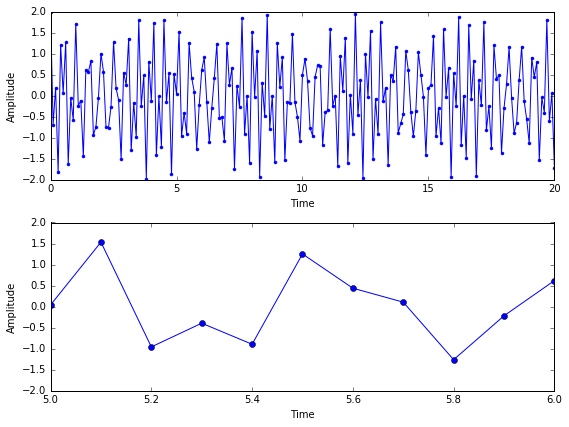

In [18]:
fs=10
f1=fs/2.05
f2=fs/5.05

ts=1/fs


tsta=0
tend=20

tvsta=5
tvend=6

tt=np.arange(tsta,tend+ts,ts)

y=np.cos(2*np.pi*f1*tt)+np.cos(2*np.pi*f2*tt)

plt.figure(figsize=[8,6])
plt.subplot(211)
plt.plot(tt,y,'b.-')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(212)
plt.plot(tt,y,'bo-')
plt.xlim(tvsta,tvend)
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()

# plt.savefig('Test_Example1_files/'+'sparseSample.pdf',format='pdf')

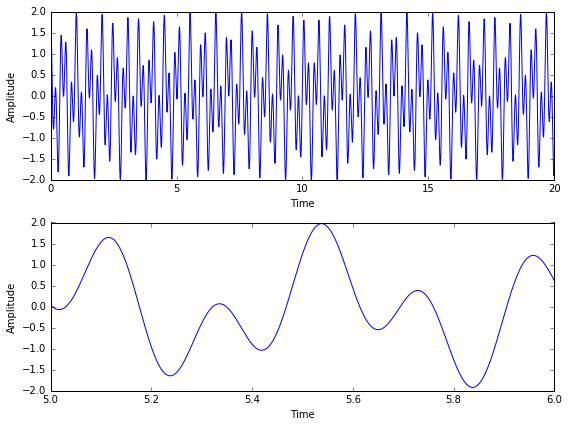

In [12]:
tint=np.arange(tsta,tend+ts/100,ts/100)

yreal=np.cos(2*np.pi*f1*tint)+np.cos(2*np.pi*f2*tint)

plt.figure(figsize=[8,6])
plt.subplot(211)
plt.plot(tint,yreal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(212)
plt.plot(tint,yreal)
plt.xlim(tvsta,tvend)
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()

# plt.savefig('Test_Example1_files/'+'realSample.pdf',format='pdf')

Sinc interpolation will have larger error at the edge, because the sum in sinc interpolation goes from $-\infty$ to $+\infty$, in real signal, at the edge, there is no $\infty$ number of data points on both side.
$$
x(t)=\sum_{n=- \infty}^{+ \infty} X(t=\frac{n}{f_s})sinc(f_s t-n)
$$
in which, $f_s$ is the sampling frequency, $X(nT_s)$ is the discrete signal with equal sample spacing, $T_s=1/f_s$.
>I think t should start from 0. Because n always start from 0. If t start from negative value, n should be adjusted to start from negative as well.

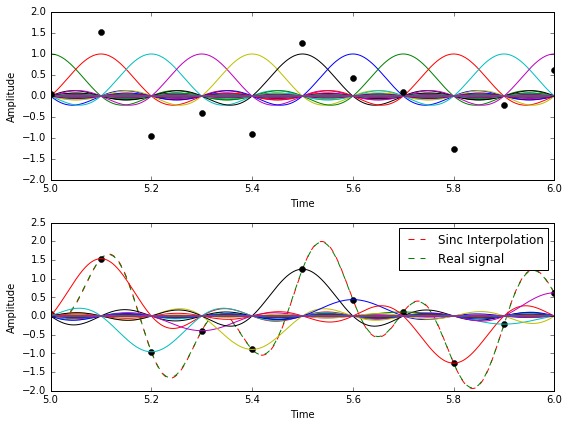

In [17]:
N=len(tt)

plt.figure(figsize=[8,6])
plt.subplot(211)

for i in range(N):
    plt.plot(tint,np.sinc(fs*tint-i))
plt.plot(tt,y,'ko')
    
Nin=len(tint)
sum1=np.zeros(Nin)
for i in range(N):
#     print(int(round(tt[i]/ts)))
    sum1 += y[i]*np.sinc(fs*tint-i)
plt.xlim(tvsta,tvend)
plt.xlabel('Time')
plt.ylabel('Amplitude')
    
ax2=plt.subplot(212)
lns1,=ax2.plot(tint,sum1,'r--',label='Sinc Interpolation')
lns2,=ax2.plot(tint,yreal,'g--',label='Real signal')
lns3,=ax2.plot(tt,y,'ko')
for i in range(N):
    ax2.plot(tint,y[i]*np.sinc(fs*tint-i))
ax2.set_xlim(tvsta,tvend)
plt.xlabel('Time')
plt.ylabel('Amplitude')
# plt.ylim([-2,2])

lns=[lns1,lns2]
ax2.legend(lns,[l.get_label() for l in lns])

plt.tight_layout()

# plt.savefig('Test_Example1_files/'+'sincInterpolation.pdf',format='pdf')

If $t$ start from negative, shift $n$ to be $n=\frac{t}{T_s}$

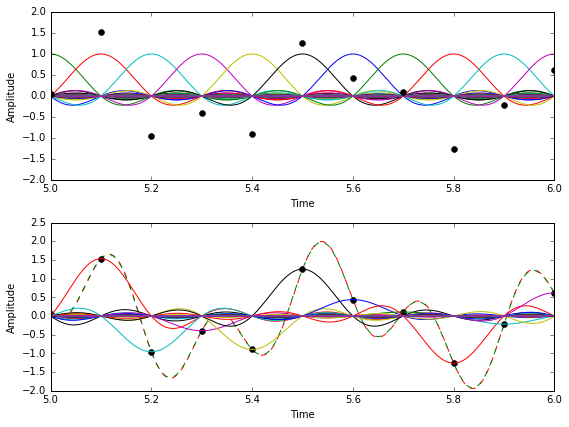

In [6]:
N=len(tt)

plt.figure(figsize=[8,6])
plt.subplot(211)

for i in range(N):
    plt.plot(tint,np.sinc(fs*tint-int(round(tt[i]/ts))))
plt.plot(tt,y,'ko')
    
Nin=len(tint)
sum2=np.zeros(Nin)
for i in range(N):
#     print(int(round(tt[i]/ts)))
    sum2 += y[i]*np.sinc(fs*tint-int(round(tt[i]*fs)))
plt.xlim(tvsta,tvend)
plt.xlabel('Time')
plt.ylabel('Amplitude')
    
plt.subplot(212)
plt.plot(tint,sum2,'r--',tint,yreal,'g--',tt,y,'ko')
for i in range(N):
    plt.plot(tint,y[i]*np.sinc(fs*tint-int(round(tt[i]*fs))))
plt.xlim(tvsta,tvend)
plt.xlabel('Time')
plt.ylabel('Amplitude')
# plt.ylim([-2,2])

plt.tight_layout()

In [7]:
sum2-sum1

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [8]:
def sincInter(tt,y,tint,fs):
    N=len(tt)
    Nin=len(tint)
    sum1=np.zeros(Nin)
    for i in range(N):
#     print(int(round(tt[i]/ts)))
        sum1 += y[i]*np.sinc(fs*tint-int(round(tt[i]*fs)))
    return sum1

In [9]:
print(tint[-1], tt[-1])

20.0 20.0
